In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
hmeq=pd.read_csv(r"C:\Users\chemm\Desktop\cours\MOSEF\Python\Exercice\Scoring\Projet_scoring\data\hmeq.csv")
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for col in numeric_columns:
    upper_limit = hmeq[col].quantile(0.99)
    hmeq[col] = np.where(hmeq[col] > upper_limit, upper_limit, hmeq[col])
print("Statistiques descriptives après limitation des valeurs extrêmes :")
print(hmeq[numeric_columns].describe())
filtered_hmeq=hmeq

Statistiques descriptives après limitation des valeurs extrêmes :
               LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.000000   
mean   18469.083893   73348.848172  100923.156505     8.900964     0.231721   
std    10540.219148   42349.225901   51730.977747     7.505444     0.685430   
min     1100.000000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.000000   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.000000   
75%    23300.000000   91488.000000  119824.250000    13.000000     0.000000   
max    60869.000000  232230.410000  289962.800000    30.000000     4.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.428067   178.572904     1.167349    21.237191    33.560672  
std

In [4]:
MissingData = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData['Percentage Missing'] = (MissingData['Missing Values'] / len(hmeq)) * 100
MissingData = MissingData.sort_values(by='Percentage Missing', ascending=False)
MissingData

,Variables,Missing Values,Percentage Missing
12,DEBTINC,1267,21.258389
7,DEROG,708,11.879195
8,DELINQ,580,9.731544
2,MORTDUE,518,8.691275
6,YOJ,515,8.640940
10,NINQ,510,8.557047
9,CLAGE,308,5.167785
5,JOB,279,4.681208
4,REASON,252,4.228188
11,CLNO,222,3.724832


In [5]:
for col in ['DEBTINC', 'DEROG', 'DELINQ', 'MORTDUE', 'YOJ', 'NINQ', 'CLAGE', 'CLNO', 'VALUE']:
    filtered_hmeq[col] = filtered_hmeq[col].fillna(filtered_hmeq[col].median())

for col in ['JOB', 'REASON']:
    filtered_hmeq[col] = filtered_hmeq[col].fillna(filtered_hmeq[col].mode()[0])

In [6]:
MissingData = filtered_hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData['Percentage Missing'] = (MissingData['Missing Values'] / len(filtered_hmeq)) * 100
MissingData = MissingData.sort_values(by='Percentage Missing', ascending=False)
MissingData

,Variables,Missing Values,Percentage Missing
0,BAD,0,0.0
1,LOAN,0,0.0
2,MORTDUE,0,0.0
3,VALUE,0,0.0
4,REASON,0,0.0
5,JOB,0,0.0
6,YOJ,0,0.0
7,DEROG,0,0.0
8,DELINQ,0,0.0
9,CLAGE,0,0.0


In [7]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Calcul de Tschuprow pour deux variables catégorielles
def tschuprow_t(df, var1, var2):
    # Crée la table de contingence
    contingency_table = pd.crosstab(df[var1], df[var2])

    # Calcule le chi-carré
    chi2, _, _, _ = chi2_contingency(contingency_table)

    # Taille de la table de contingence
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1

    # Calcule le coefficient de Tschuprow
    tschuprow = np.sqrt(chi2 / (n * k))
    
    return tschuprow

# Application du test de Tschuprow sur les variables catégorielles et BAD
tschuprow_RESON_BAD = tschuprow_t(filtered_hmeq, 'REASON', 'BAD')
tschuprow_JOB_BAD = tschuprow_t(filtered_hmeq, 'JOB', 'BAD')

print(f"Coefficient de Tschuprow entre REASON et BAD: {tschuprow_RESON_BAD}")
print(f"Coefficient de Tschuprow entre JOB et BAD: {tschuprow_JOB_BAD}")


Coefficient de Tschuprow entre REASON et BAD: 0.037058732135371496
Coefficient de Tschuprow entre JOB et BAD: 0.1112882864315084


Ces valeurs de coefficient de Tschuprow étant faibles, elles indiquent que ni REASON ni JOB n'ont une association forte avec BAD. Vous pourriez donc envisager de :

Exclure REASON du modèle, surtout si cela simplifie l'analyse, car il semble très peu pertinent pour prédire BAD.
Inclure JOB dans le modèle, mais en sachant qu'il est peu probable qu'il ait un impact significatif.

In [8]:
filtered_hmeq = pd.get_dummies(filtered_hmeq, columns=['REASON', 'JOB'], drop_first=True)

In [9]:
#Cas de la regression logistique : 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
filtered_hmeq[columns_to_scale] = scaler.fit_transform(filtered_hmeq[columns_to_scale])

In [10]:
descriptive_stats = filtered_hmeq.describe()
print(descriptive_stats)

               BAD          LOAN      MORTDUE         VALUE           YOJ  \
count  5960.000000  5.960000e+03  5960.000000  5.960000e+03  5.960000e+03   
mean      0.199497 -2.288997e-16     0.000000  1.907497e-17 -9.060612e-17   
std       0.399656  1.000084e+00     1.000084  1.000084e+00  1.000084e+00   
min       0.000000 -1.648025e+00    -1.740922 -1.808398e+00 -1.214604e+00   
25%       0.000000 -6.991982e-01    -0.604122 -6.674240e-01 -7.975345e-01   
50%       0.000000 -2.058084e-01    -0.187654 -2.237104e-01 -2.414419e-01   
75%       0.000000  4.583701e-01     0.384280  3.570079e-01  4.536738e-01   
max       1.000000  4.023016e+00     3.937832  3.691942e+00  2.956091e+00   

              DEROG        DELINQ         CLAGE          NINQ          CLNO  \
count  5.960000e+03  5.960000e+03  5.960000e+03  5.960000e+03  5.960000e+03   
mean  -6.557022e-18  7.153115e-18  1.239873e-16  4.768743e-18  4.768743e-17   
std    1.000084e+00  1.000084e+00  1.000084e+00  1.000084e+00  1.0000

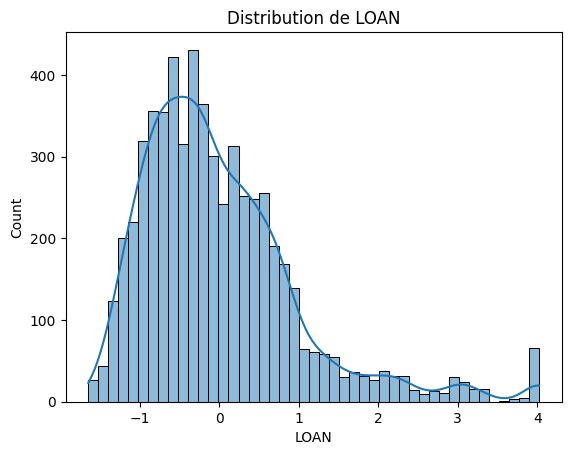

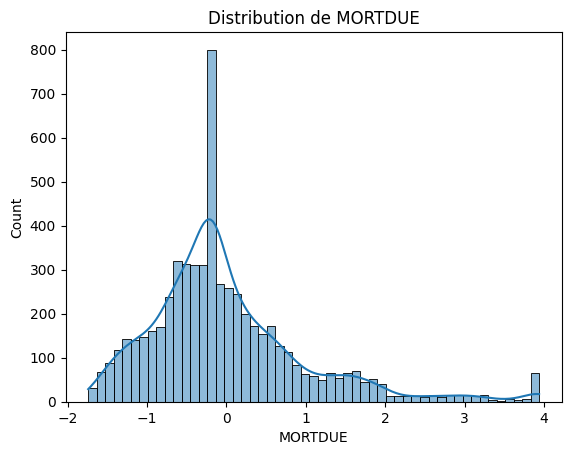

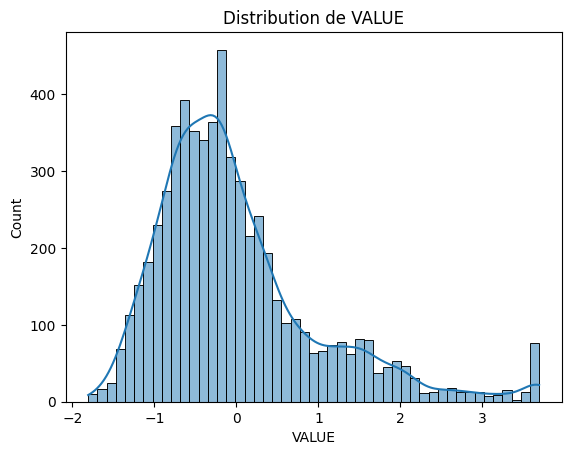

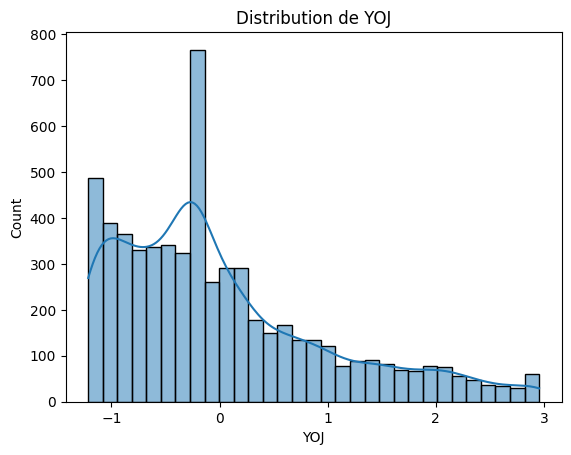

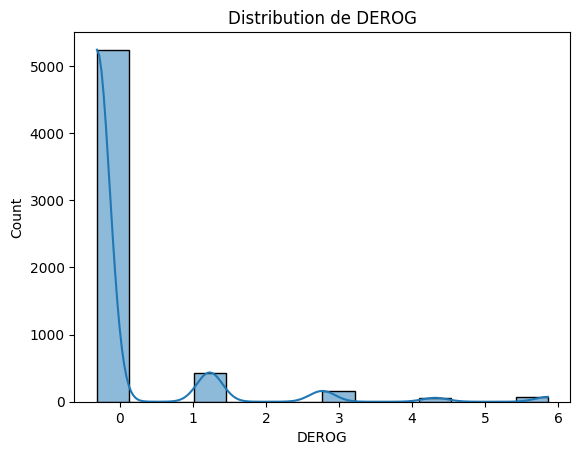

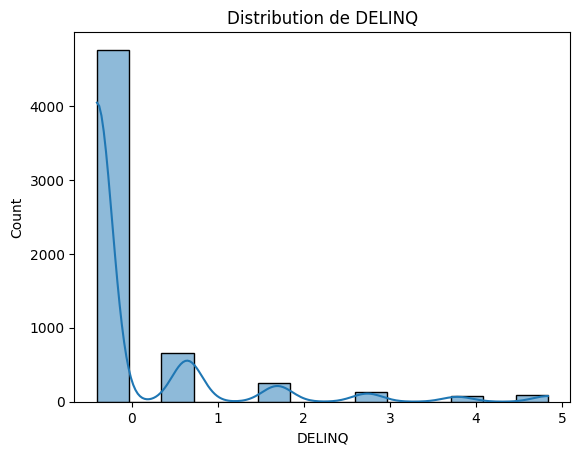

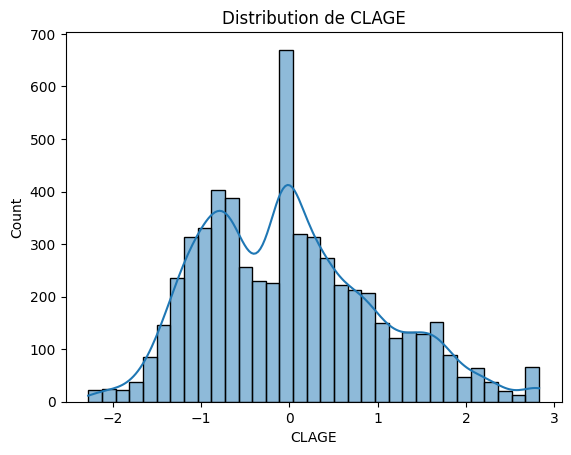

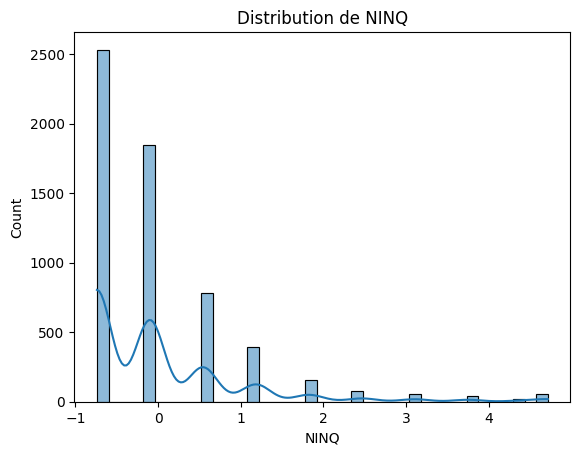

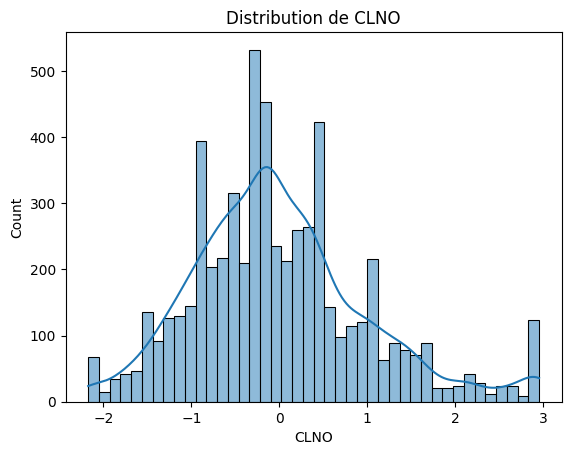

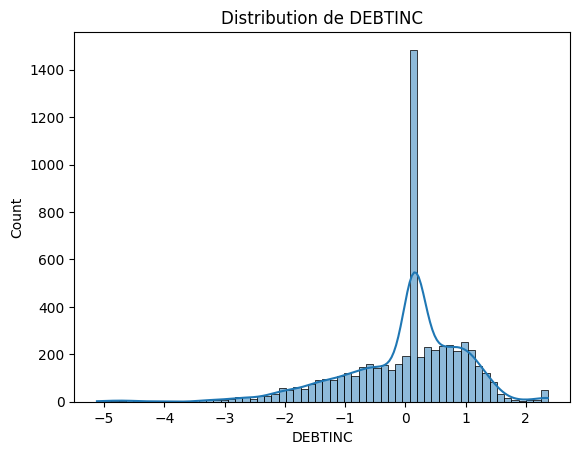

In [11]:
for col in ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']:
    plt.figure()
    sns.histplot(filtered_hmeq[col].dropna(), kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()

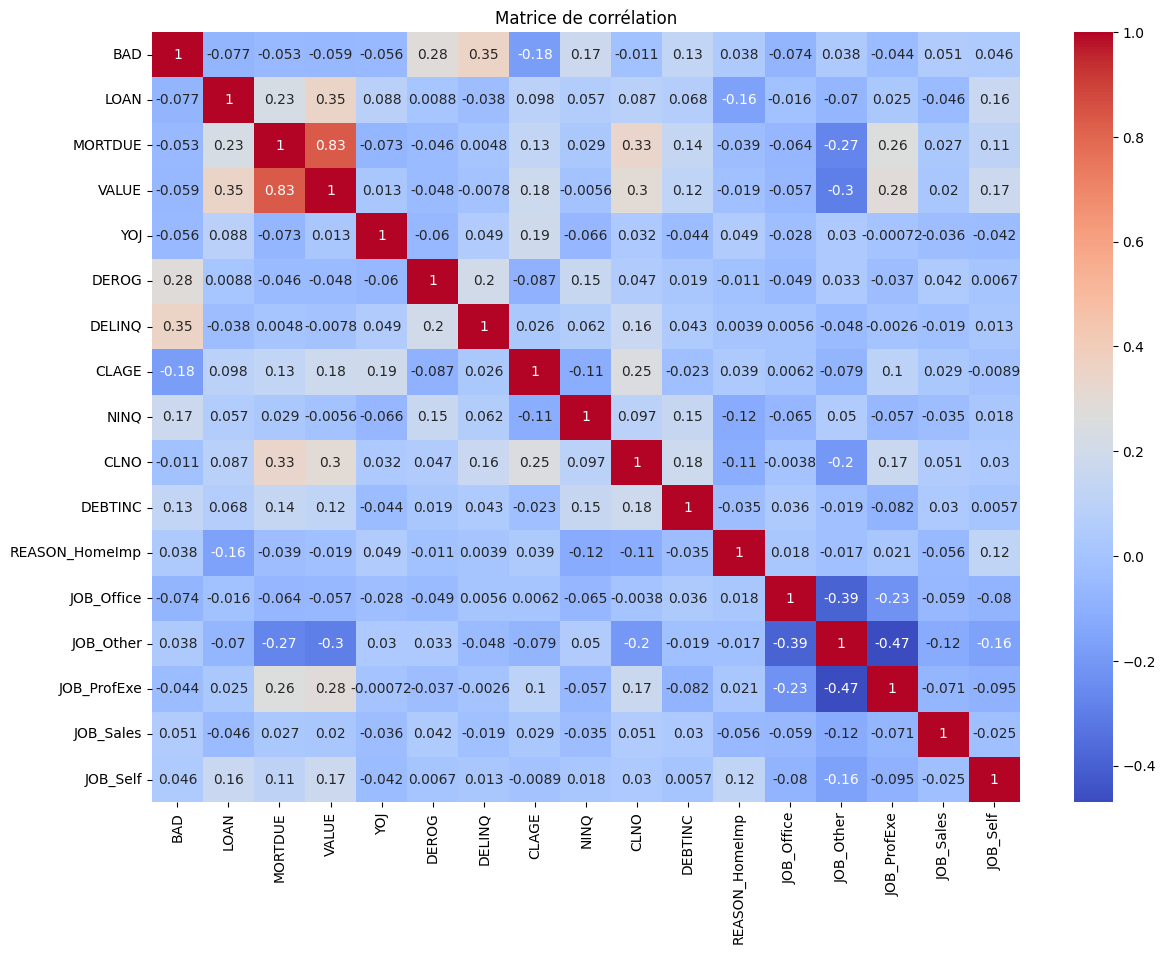

In [12]:
corr_matrix = filtered_hmeq.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

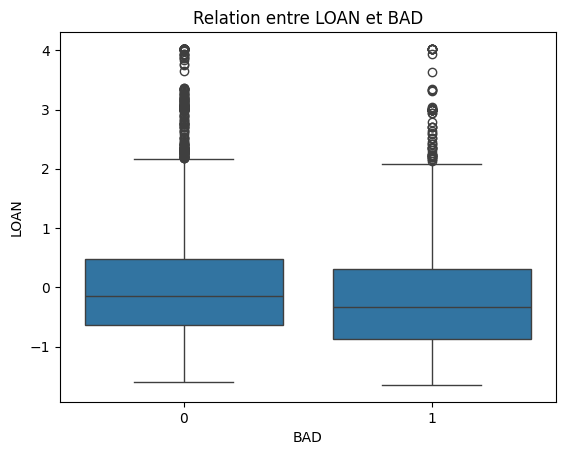

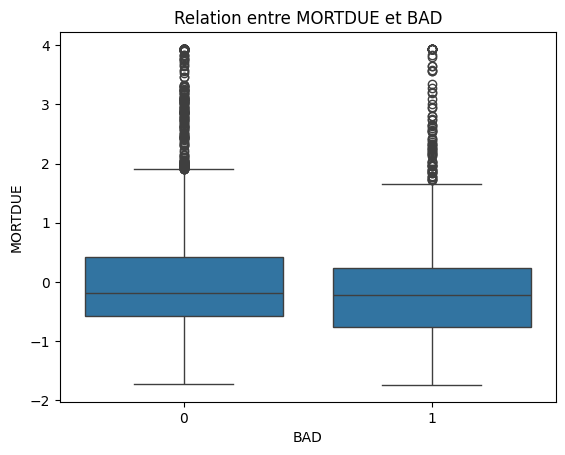

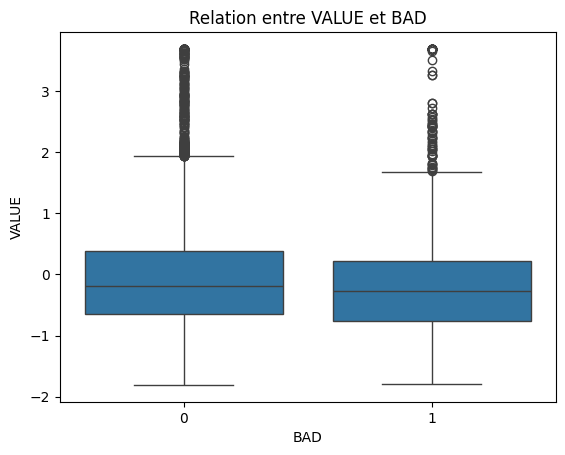

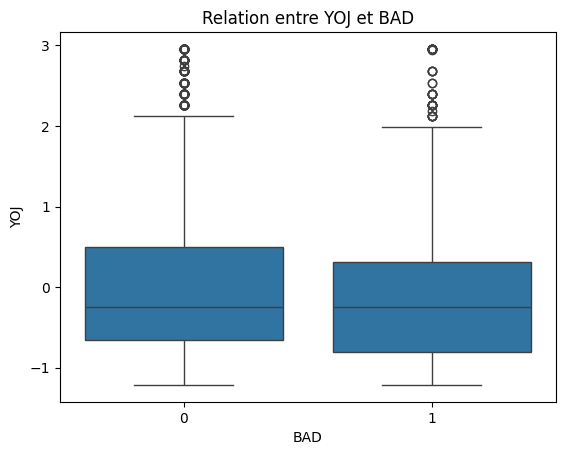

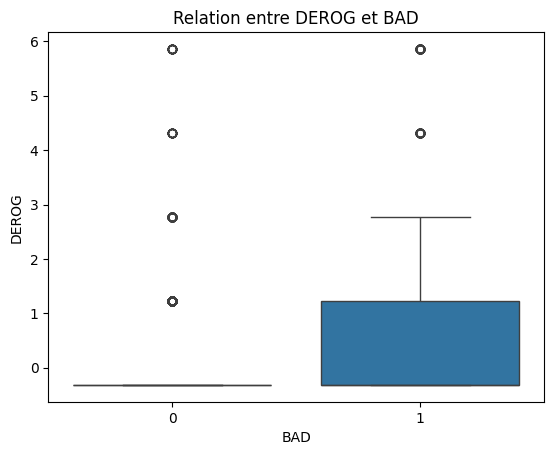

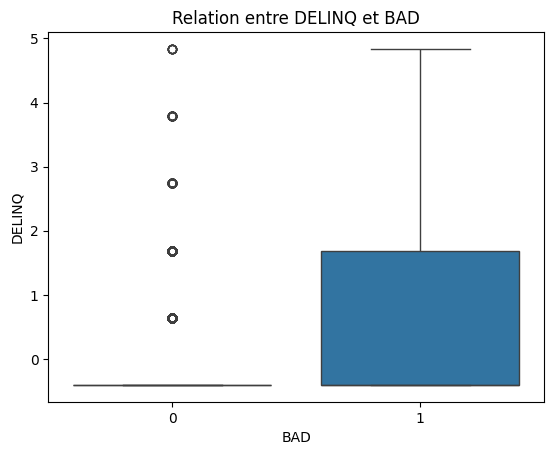

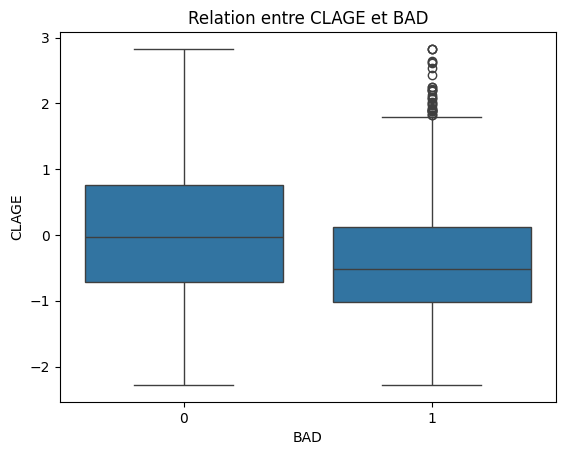

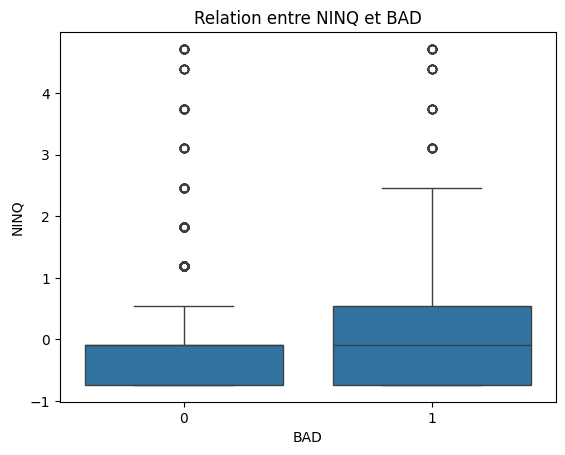

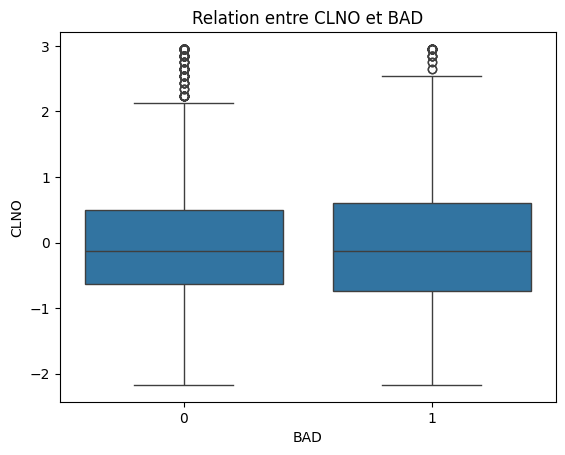

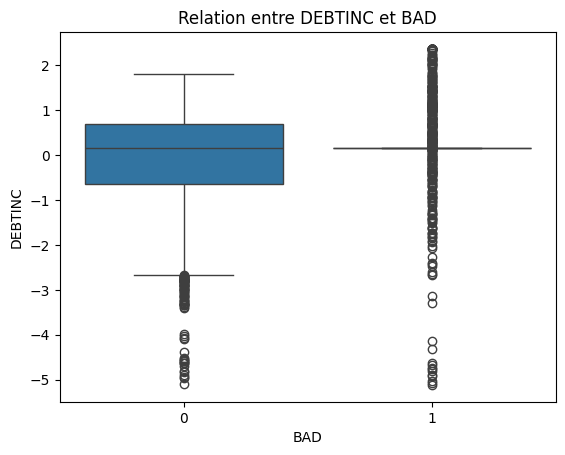

In [13]:
for col in ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']:
    plt.figure()
    sns.boxplot(x='BAD', y=col, data=filtered_hmeq)
    plt.title(f'Relation entre {col} et BAD')
    plt.show()

In [13]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# X = filtered_hmeq.drop(['BAD'], axis=1)
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
# print(vif_data)

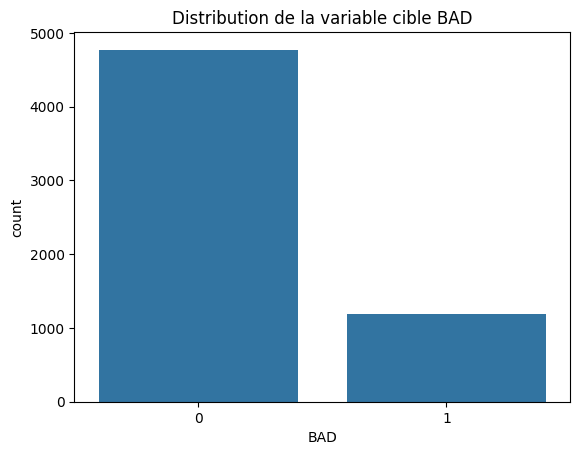

In [14]:
sns.countplot(x='BAD', data=filtered_hmeq)
plt.title('Distribution de la variable cible BAD')
plt.show()

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Séparez les features et la variable cible
X = filtered_hmeq.drop('BAD', axis=1)
y = filtered_hmeq['BAD']

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Appliquez SMOTE pour équilibrer les classes dans l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Entraînez le modèle de régression logistique
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)

# Prédiction et évaluation
y_pred = log_reg.predict(X_test)
y_pred_probs = log_reg.predict_proba(X_test)[:, 1]

print("Régression Logistique - Classification Report")
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_probs))


Régression Logistique - Classification Report
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1431
           1       0.43      0.62      0.51       357

    accuracy                           0.76      1788
   macro avg       0.66      0.71      0.67      1788
weighted avg       0.80      0.76      0.78      1788

AUC-ROC: 0.7649290324096096


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Entraînez le modèle de Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)

# Prédiction et évaluation
y_pred_rf = rf.predict(X_test)
y_pred_probs_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_probs_rf))


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1431
           1       0.80      0.76      0.78       357

    accuracy                           0.91      1788
   macro avg       0.87      0.85      0.86      1788
weighted avg       0.91      0.91      0.91      1788

AUC-ROC: 0.9572217426453462


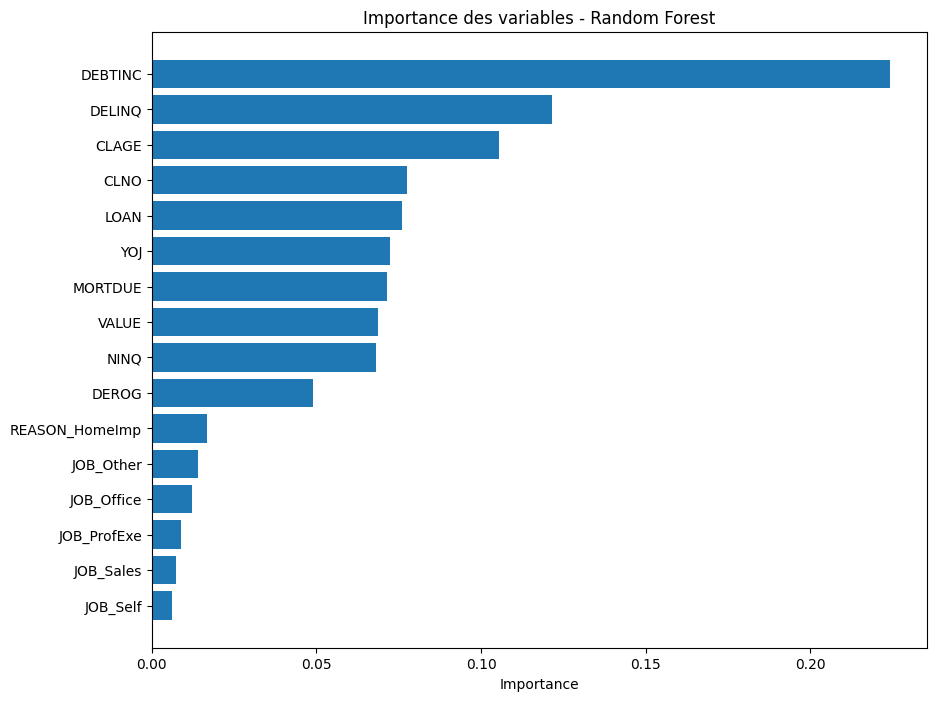

In [18]:
feature_importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Importance")
plt.title("Importance des variables - Random Forest")
plt.show()


AUC: 0.9572217426453462
Coefficient de Gini: 0.9144434852906924


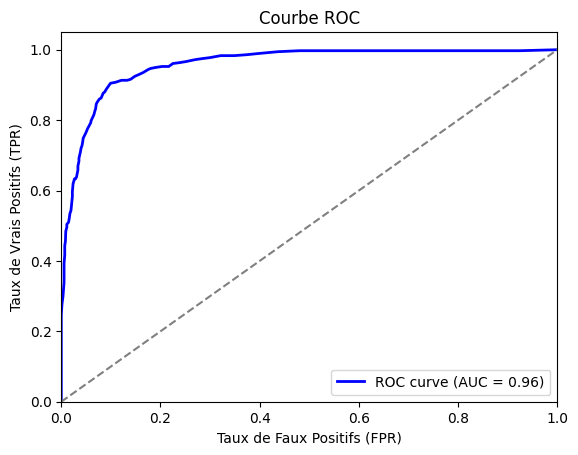

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assurez-vous d'avoir une prédiction de probabilité de la classe 1 pour l'ensemble de test
# Exemple avec un modèle de Random Forest
y_pred_probs = rf.predict_proba(X_test)[:, 1]  # Probabilité de la classe 1

# Calcul de l'AUC
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC: {auc_score}")

# Calcul du coefficient de Gini
gini_score = 2 * auc_score - 1
print(f"Coefficient de Gini: {gini_score}")

# Tracé de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


Ces métriques indiquent que votre modèle est performant pour la prédiction de la variable BAD. Vous pouvez être confiant dans la capacité de votre modèle à discriminer efficacement les deux classes.

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Définissez le modèle
rf = RandomForestClassifier(random_state=42)

# Définissez la distribution des hyperparamètres pour le RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 40),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Configurez le RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42, verbose=2)

# Entraînez avec RandomizedSearchCV
random_search.fit(X_train_res, y_train_res)

# Affichez les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres trouvés :", random_search.best_params_)
print("Meilleur score AUC :", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Meilleurs paramètres trouvés : {'max_depth': 37, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 413}
Meilleur score AUC : 0.9905681899673707


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définissez le modèle
rf = RandomForestClassifier(random_state=42)

# Définissez la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurez le GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Entraînez avec GridSearchCV
grid_search.fit(X_train_res, y_train_res)

# Affichez les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleur score AUC :", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs paramètres trouvés : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Meilleur score AUC : 0.9905314371257485


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Définir le modèle Elastic Net pour la régression logistique
elastic_net = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000, random_state=42)

# Définir la grille de paramètres
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Valeurs pour la force de régularisation
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]  # Différents ratios L1/L2
}

# Configurer le GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Entraîner le modèle Elastic Net avec GridSearchCV
grid_search.fit(X_scaled, y_train_res)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleur score AUC :", grid_search.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Meilleurs paramètres trouvés : {'C': 0.1, 'l1_ratio': 0.5}
Meilleur score AUC : 0.8271661766287783


In [27]:
# Récupérer les meilleurs paramètres
best_model = grid_search.best_estimator_

# Afficher les coefficients des variables
coefficients = best_model.coef_.flatten()
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Trier les coefficients par importance absolue
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df)


           Feature  Coefficient  Abs_Coefficient
5           DELINQ     1.068007         1.068007
12       JOB_Other     0.646897         0.646897
13     JOB_ProfExe     0.549857         0.549857
4            DEROG     0.545540         0.545540
6            CLAGE    -0.512832         0.512832
9          DEBTINC     0.453999         0.453999
15        JOB_Self     0.432844         0.432844
14       JOB_Sales     0.410582         0.410582
0             LOAN    -0.249967         0.249967
7             NINQ     0.224068         0.224068
10  REASON_HomeImp     0.223854         0.223854
11      JOB_Office     0.186783         0.186783
8             CLNO    -0.163594         0.163594
1          MORTDUE    -0.058786         0.058786
3              YOJ    -0.035719         0.035719
2            VALUE    -0.034972         0.034972
